In [40]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv("/home/th00masml/documents/Minimum Wage Data.csv", encoding = "latin") # Need to change encoding in order to run csv file
df.to_csv("/home/th00masml/documents/minwage.csv", encoding = "utf-8") # Saving it it for the future
df = pd.read_csv("/home/th00masml/documents/minwage.csv") # Reading new version of csv file

In [47]:
df.head(5)

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [48]:
act_min_wage.describe()

ValueError: Cannot describe a DataFrame without columns

In [49]:
# Grouping and creating index
gb = df.groupby("State")
gb.get_group("Alabama").set_index('Year').head(5)

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [50]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns = {"Low.2018":name}) # Renaming for empty value
    else:
        act_min_wage = act_min_wage.join (group.set_index("Year")[["Low.2018"]].rename(columns = {"Low.2018":name})) # Joining 
        

In [29]:
act_min_wage.head(5)

""


In [30]:
act_min_wage.corr().head() # Get correlation. Question: what is NaN here?

""


In [51]:
df.head(5)

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [52]:
issue_df = df[df["Low.2018"] == 0] # Creating df for certain issue
issue_df.head()
issue_df["State"].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [33]:
act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head() # Replacing 0 values with NaN values from numpy; dropna drops entire 1=column, 0=row

""


In [53]:
# Searching for missing values
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()

for problem in issue_df["State"].unique():
    if problem in min_wage_corr.columns:
        print ("Something is missing here...")
        
grouped_issues = issue_df.groupby("State")
grouped_issues.get_group("Alabama").head(3)

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
55,55,1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
110,110,1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0


In [54]:
grouped_issues.get_group("Alabama")["Low.2018"].sum()

0.0

In [55]:
# Printing issues
for state, data in grouped_issues:
    if data['Low.2018'].sum() != 0.0:
        print("Data found for", state)

In [37]:
"""Visualising"""

'Visualising'

In [38]:
import matplotlib.pyplot as plt

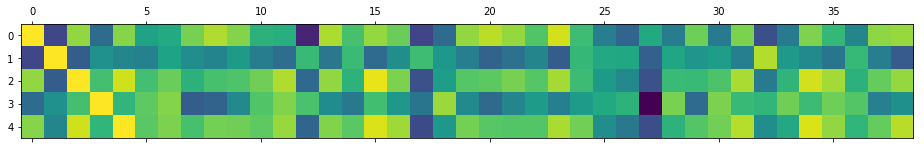

In [56]:
# First, let's look at simple matrix of data
plt.matshow(min_wage_corr)
plt.show()